## Read input

In [62]:
import json

def load_json(path):

    # Add .json to the end of file if needed
    if path.find(".json") < 0:
        path = path + ".json"

    # Read JSON file
    with open(path) as data_file:
        data_loaded = json.load(data_file)

    return data_loaded

def get_input_dic2(instance_path):
   
    print("Reading testset...")
    
    instances_dic = load_json(instance_path)
    
    # Where to save results?
    result_folder = instances_dic["result_folder"]
    
    instance_names = dict()
    
    # Instance names
    allow_vehicle_creation = instances_dic["scenario_config"]["allow_vehicle_creation"]
    allow_delay_extension = instances_dic["scenario_config"]["allow_delay_extension"]
    time_window = instances_dic["scenario_config"]["time_window"]
    time_horizon = instances_dic["scenario_config"]["time_horizon"]
    max_requests = instances_dic["scenario_config"]["max_requests"]
    initial_fleet = instances_dic["scenario_config"]["initial_fleet"]
    max_capacity = instances_dic["scenario_config"]["max_capacity"]
    service_rate = instances_dic["scenario_config"]["service_rate"]
    customer_segmentation = instances_dic["scenario_config"]["customer_segmentation"]
    service_level = instances_dic["scenario_config"]["service_level"]
    max_rounds_idle_before_rebalance  = instances_dic["scenario_config"]["max_rounds_idle_before_rebalance"]
    deactivation_factor = instances_dic["scenario_config"]["deactivation_factor"]
    max_delay_extensions = instances_dic["scenario_config"]["max_delay_extensions"]
    
    method_name = ["FCFS_WEEK"]
    for allow_creation in allow_vehicle_creation:
        for allow_extension in allow_delay_extension:
            for methodName in method_name:
                for nOfVehicles in initial_fleet:
                    for vehicleCapacity in max_capacity:
                        for maxNumberOfTrips in max_requests:
                            for maxRoundsIdleBeforeRebalance in max_rounds_idle_before_rebalance:
                                for deactivationFactor in deactivation_factor:
                                    for maxDelayExtensionsBeforeHiring in max_delay_extensions:
                                        for timeHorizon in time_window:
                                            for totalHorizon in time_horizon:
                                                for serviceRate in service_rate.keys():
                                                    for customerSegmentation in customer_segmentation.keys():
                                                        
                                                        creation = "PLUS" if allow_creation else "ONLY"
                                                        
                                                        deactivationFactor_up = ("DEA-{:02}"
                                                                             .format(deactivationFactor)
                                                                             if allow_creation else "DEA-NO")
                                                        
                                                        
                                                        rebalance_up = ("REB{:03}"
                                                                      .format(int(maxRoundsIdleBeforeRebalance))
                                                                      if maxRoundsIdleBeforeRebalance < 100000 else "REB_NO")
                                                        
                                                        maxDelayExtensionsBeforeHiring_up = ("EXT-{:02}"
                                                                                          .format(int(maxDelayExtensionsBeforeHiring))
                                                                                          if allow_extension else "EXT-NO")
                                                        
                                                        
                                                        
                                                        #print(deactivationFactor, maxDelayExtensionsBeforeHiring, creation)
                                                        instance_name = "{}_V{:03}_{}-{:02}_R{:03}_{}_{}_{}_TW{:02}_TH{:05}_{}_{}".format(methodName,
                                                                                                                                                nOfVehicles,
                                                                                                                                                creation,
                                                                                                                                                vehicleCapacity,
                                                                                                                                                maxNumberOfTrips,
                                                                                                                                                rebalance_up,
                                                                                                                                                deactivationFactor_up,
                                                                                                                                                maxDelayExtensionsBeforeHiring_up, 
                                                                                                                                                timeHorizon,
                                                                                                                                                totalHorizon,
                                                                                                                                                serviceRate,
                                                                                                                                                customerSegmentation)
                                                        
                                                        print(instance_name)
        
                                                        
                                                        if not os.path.isfile("output/{}.csv".format(instance_name)):
                                                            continue
                                                        
                                                        
                                                        input_data = {"methodName":methodName,
                                                                      "nOfVehicles":nOfVehicles,
                                                                      "vehicleCapacity":vehicleCapacity,
                                                                      "maxNumberOfTrips":maxNumberOfTrips,
                                                                      "maxRoundsIdleBeforeRebalance":maxRoundsIdleBeforeRebalance,
                                                                      "deactivationFactor":deactivationFactor,
                                                                      "maxDelayExtensionsBeforeHiring":maxDelayExtensionsBeforeHiring,
                                                                      "timeHorizon":timeHorizon,
                                                                      "totalHorizon":totalHorizon,
                                                                      "serviceRate":serviceRate,
                                                                      "customerSegmentation":customerSegmentation}
                                                        
                                                        instance_names[instance_name] = input_data
                                                        
                                                        


    return result_folder, instance_names

In [63]:
def get_results_dic(name_experiment):
    
    # Load results
    # df = pd.read_csv("C:/Users/breno/IdeaProjects/qosc/{}.csv".format(name_experiment), index_col="timestamp",  parse_dates = True, comment='#')
    df = pd.read_csv("output/{}.csv".format(name_experiment), index_col="timestamp",  parse_dates = True, comment='#')

    # Number of requests
    latest = df.index.values[-1]
    total_requests = df["n_requests"].sum()
    total_runtime = df["run_time"].sum()/1000/60
    serviced = df["finished"][-1]
    denied = df["denied"][-1]
    total_seats = df["total_capacity"][-1]
    distance_traveled_cruising = df["distance_traveled_cruising"][-1]/1000
    distance_traveled_loaded = df["distance_traveled_loaded"][-1]/1000
    distance_traveled_rebalancing = df["distance_traveled_rebalancing"][-1]/1000
    fleet_makeup_labels = [col for col in list(df) if 'V' in col]
    fleet_makeup = {mk:df[mk][-1] for mk in fleet_makeup_labels}
    avg_pk_delay = df["pk_delay"].mean()
    avg_ride_delay = df["total_delay"].mean()
    #seats = {"seats_" + k:int(k[1:]) * v for k,v in fleet_makeup.items()}
    

    # Filter occupancy columns
    #df_occupancy = df[occupancy_labels]
    
    # Build fleet status
    #df_status = pd.DataFrame(df_occupancy)
    #df_status["picking_up"] = df["picking_up"]
    #df_status["idle"] = df["idle"]
    
    # Smooth values
    #df_occupancy = df_occupancy.rolling(window=24).mean()

    # Dictionary of agreggate data
    dic_agreggate_data = {"serviced":serviced,
                          "denied":denied,
                          "total_requests":total_requests,
                          "avg_pk_delay":"{:.2f}".format(avg_pk_delay),
                          "avg_ride_delay":"{:.2f}".format(avg_ride_delay),
                          "total_runtime":"{:.2f}".format(total_runtime),
                          "distance_cruising": "{:.2f}".format(distance_traveled_cruising),
                          "distance_rebalancing": "{:.2f}".format(distance_traveled_rebalancing),
                          "distance_loaded": "{:.2f}".format(distance_traveled_loaded),
                          "total_seats":total_seats}
    
    # All data
    dic_ag = {**dic_agreggate_data, **fleet_makeup}
    #dic_ag = {**dic_ag, **seats}

    return dic_ag

# Reading all instances

In [83]:
import os
import os.path

root_path = os.getcwd().replace("\\","/")

instance_file = "src/main/resources/caseStudy.json"

result_folder, input_dic = get_input_dic2(instance_file)

result_folder = "{}/{}".format(root_path, result_folder)

labels_input = ["initial_fleet",
                "initial_capacity",
                "max_requests",
                "time_window",
                "time_horizon",
                "srate_scenario",
                "c_segmentation"]

print(len(input_dic.keys()), " case studies created. Figures will be saved at \"", result_folder, "\"")


Reading testset...


KeyError: 'max_rounds_idle_before_rebalance'

In [58]:
def get_dimensions(name_experiment):
# Load results
    df = pd.read_csv("output/{}.csv".format(name_experiment), index_col="timestamp",  parse_dates = True, comment = "#")
    
    x = df.index.values
    total_capacity = df["total_capacity"].values
    empty =  df["empty_seats"]
    picking_up = df["picking_up_seats"]
    rebalancing = df["rebalancing_seats"]

    return {"total_capacity": (min(total_capacity), max(total_capacity)), "time":(min(x), max(x))}

# TEST
# name_experiment = "FCFS_V1000-04_R1000_REB040_DEA00003_EXT00_TW30_TH03600_S1_A"
# get_dimensions(name_experiment)

In [59]:
import math
import pandas as pd

dic_dimensions = dict()
dic_th = dict()

for name_experiment in input_dic.keys():
    try:
        #print(name_experiment, input_dic[name_experiment])
        
        fleet_size = input_dic[name_experiment]["nOfVehicles"]
        v_cap = input_dic[name_experiment]["vehicleCapacity"]
        th = input_dic[name_experiment]["totalHorizon"]
        
        d = get_dimensions(name_experiment)
        
        if th not in dic_th:
            dic_th[th] =  d['time']
        else:
            time_min, time_max = dic_th[th]
            time_min_new, time_max_new = d['time']
            dic_th[th] =  (min([time_min_new, time_min]), max([time_max_new, time_max]))
            
        if (fleet_size, v_cap, th) not in dic_dimensions:
            dic_dimensions[(fleet_size, v_cap, th)] = d
            
        
        else:
        
            cap_min, cap_max = dic_dimensions[(fleet_size, v_cap, th)]['total_capacity']
            time_min, time_max = dic_dimensions[(fleet_size, v_cap, th)]['time']
            
            cap_min_new, cap_max_new = d['total_capacity']
            time_min_new, time_max_new = d['time']
            
            dic_dimensions[(fleet_size, v_cap, th)] = {"total_capacity": (min([cap_min, cap_min_new]),
                                                                          max([cap_max, cap_max_new])),
                                                       "time":(min([time_min_new, time_min]),
                                                               max([time_max_new, time_max]))}
            # print(dic_dimensions)


    except Exception as e:
        #print("Fail", name_experiment, str(e))
        continue

# Get the next dimension that is a multiple of 1000
for k,v in dic_dimensions.items():
    # print(k,v)
    max_capacity = v["total_capacity"][1]
    max_capacity = math.ceil(max_capacity/1000)*1000
    v['total_capacity'] =  (v["total_capacity"][0], max_capacity)

In [30]:
# Dimensions and time horizons
from pprint import pprint
pprint(dic_dimensions)
pprint(dic_th)

{(1000, 6, 604800): {'time': (numpy.datetime64('2011-02-01T00:00:30.000000000'),
                              numpy.datetime64('2011-02-08T00:37:30.000000000')),
                     'total_capacity': (6000, 6000)}}
{604800: (numpy.datetime64('2011-02-01T00:00:30.000000000'),
          numpy.datetime64('2011-02-08T00:37:30.000000000'))}


In [7]:
trip_path = "C:/Users/LocalAdmin/OneDrive/Phd_TU/PROJECTS/in/input_tripdata/data/tripdata/tripdata_excerpt_2011-2-1_2011-2-28_ids.csv"

df_demand = pd.read_csv(trip_path, index_col="pickup_datetime",  parse_dates = True, comment = "#")


In [8]:
df_demand_7 = df_demand.loc['2011-02-01 00:00:00':'2011-02-07 23:59:59']
df_demand_7

,passenger_count,pk_id,dp_id,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
pickup_datetime,,,,,,,
2011-02-01 00:00:00,1,2527,669,40.769223,-73.982005,40.801843,-73.949197
2011-02-01 00:00:00,1,1266,3752,40.772162,-73.952847,40.780745,-73.946672
2011-02-01 00:00:00,1,4250,3347,40.760737,-73.975547,40.733373,-74.003043
2011-02-01 00:00:00,1,1137,1114,40.808022,-73.964057,40.737490,-74.008177
2011-02-01 00:00:00,2,1503,2335,40.738107,-73.983683,40.767477,-73.953305
2011-02-01 00:00:00,1,485,4172,40.780527,-73.952967,40.783210,-73.950857
2011-02-01 00:00:00,1,4229,2717,40.767200,-73.995817,40.705137,-74.017275
2011-02-01 00:00:00,5,2529,4308,40.733725,-74.002628,40.728817,-73.990460
2011-02-01 00:00:00,5,2194,3671,40.715330,-73.984383,40.722100,-74.000498


In [9]:
sum_30 = df_demand_7.passenger_count.resample('30s').sum()
count_30 = df_demand_7.passenger_count.resample('30s').count()
count_sum = pd.concat([sum_30, count_30], axis = 1, sort = False)

In [10]:
sum_30

pickup_datetime
2011-02-01 00:00:00    109
2011-02-01 00:00:30     40
2011-02-01 00:01:00     91
2011-02-01 00:01:30     24
2011-02-01 00:02:00    119
2011-02-01 00:02:30     34
2011-02-01 00:03:00    104
2011-02-01 00:03:30     21
2011-02-01 00:04:00    151
2011-02-01 00:04:30     31
2011-02-01 00:05:00    122
2011-02-01 00:05:30     45
2011-02-01 00:06:00    118
2011-02-01 00:06:30     28
2011-02-01 00:07:00    125
2011-02-01 00:07:30     32
2011-02-01 00:08:00     87
2011-02-01 00:08:30     25
2011-02-01 00:09:00     99
2011-02-01 00:09:30     30
2011-02-01 00:10:00    133
2011-02-01 00:10:30     47
2011-02-01 00:11:00    131
2011-02-01 00:11:30     49
2011-02-01 00:12:00    118
2011-02-01 00:12:30     41
2011-02-01 00:13:00    136
2011-02-01 00:13:30     28
2011-02-01 00:14:00    128
2011-02-01 00:14:30     24
                      ... 
2011-02-07 23:45:00    166
2011-02-07 23:45:30     28
2011-02-07 23:46:00    133
2011-02-07 23:46:30     26
2011-02-07 23:47:00    100
2011-02-07 2

In [11]:
import os.path
import numpy as np
import matplotlib.pyplot as plt

count_sum.plot(figsize=(18,3))

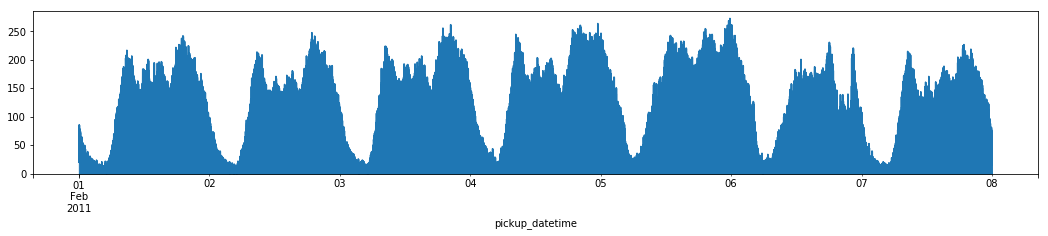

In [12]:
count_30.plot.area(figsize=(18,3))

566
566


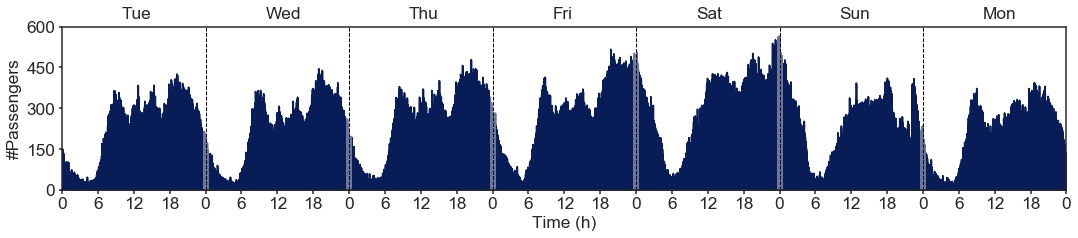

In [13]:
import os.path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define axis
x = sum_30.index.values
y = sum_30.values
print_details_axis = ("Time (h)", "#Passengers")
show_tick_label_x = True
fontsize="xx-large"
label_y = ([0, 150, 300, 450, 600], ['0', '150', '300', '450', '600'])

fontsize_label="xx-large"
print(max(sum_30))

 # Close figure
plt.clf()

smooth = None

# Smoth lines in y
if smooth:
    y = gaussian_filter1d(y, sigma=smooth)

# Choosing palette. Source: https://seaborn.pydata.org/tutorial/color_palettes.html
adrift_in_dreams_4 = ['#081d58', '#e31a1c', '#225ea8', '#1d91c0']

pallete = adrift_in_dreams_4

sns.set_style("ticks")
sns.set_palette(sns.color_palette(pallete))

# Set the y limits making the maximum 5% greater
#plt.ylim(ymin, ymax)

ax = plt.gca()
t_width = 1.5
ax.tick_params(width = t_width)
ax.spines['top'].set_linewidth(t_width)
ax.spines['right'].set_linewidth(t_width)
ax.spines['bottom'].set_linewidth(t_width)
ax.spines['left'].set_linewidth(t_width)

plt.plot(x,y, color ='#081d58')
plt.stackplot(x, y, color = '#081d58')

x_min = datetime.strptime('2011-02-01T00:00:00','%Y-%m-%dT%H:%M:%S')
x_max = datetime.strptime('2011-02-08T00:00:00','%Y-%m-%dT%H:%M:%S')
    
fig = plt.gcf()
fig.set_size_inches(18,3)

rangeDates = pd.date_range(start=x_min,
                           end=x_max,
                           freq="6h")

rangeDatesLabel = [str(int(d.strftime('%H'))) for d in rangeDates]

# Day of the week line separator
dashed_line = datetime.strptime('2011-02-01 00:00:00', '%Y-%m-%d %H:%M:%S')

# First date week
week_day = datetime.strptime('2011-02-01 00:00:00', '%Y-%m-%d %H:%M:%S') + timedelta(hours = 10)

#week_pos = -30
week_pos = 630
#plt.gca().invert_yaxis()

# Loop days of the week
for i in range(0,7):

    # Print week day
    plt.text(week_day,
         week_pos,
         week_day.strftime("%a"),
         fontsize='xx-large',
         bbox=dict(boxstyle='square,pad=0.1',
                   alpha=0.5,
                   fc='white',
                   ec='none'))

    week_day = week_day + timedelta(hours = 24)

for i in range(0,6):

    # Print day separator
    dashed_line = dashed_line + timedelta(hours = 24)

    # White box below dashed line for constrast
    plt.axvline(x = dashed_line,
                linewidth=6,
                color='white',
                alpha=0.4)

    # Dashed line to separate week days
    plt.axvline(x = dashed_line,
                linewidth=1,
                color='black',
                linestyle='--')

# Print x, y axis labels
det_x, det_y = print_details_axis
if det_x:
    plt.xlabel(det_x, fontsize=fontsize_label)
if det_y:
    plt.ylabel(det_y, fontsize=fontsize_label)
    
# Remove white margins
plt.margins(0,0)


if show_tick_label_x:
    ticks_x = rangeDatesLabel
        
plt.xticks(rangeDates, ticks_x, fontsize=fontsize)

# Plot

print(max(y))

l_y, t_y = label_y
if l_y is not None:
    plt.yticks(l_y,t_y,fontsize=fontsize)
else:
    plt.yticks(fontsize=fontsize)

name_fig = "Demand.svg"
plt.savefig(name_fig, bbox_inches="tight")

In [14]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
# Empty or occupied
from datetime import datetime, timedelta
    
def plot_seat_status_graph(result_folder,
                           name_experiment,
                           replace=True,
                           smooth=None,
                           print_details=True,
                           print_details_axis = (None, None, None),
                           day_sep_config = (dict(linewidth=6, color='white', alpha=0.4), dict(linewidth=1, color='black', linestyle='--')),
                           fontsize_ticks = 'xx-large',
                           x_max = datetime.strptime('2011-02-08T00:00:00','%Y-%m-%dT%H:%M:%S'),
                           fig_type = 'png'):
    
    if not os.path.exists(result_folder):
        os.makedirs(result_folder)
    
        
     # Save figure
    name_fig = "{}/{}.{}".format(result_folder, "SS_" + name_experiment, fig_type)

    if os.path.isfile(name_fig) and not replace:
        return
    
    srate_dict = {'S1':'High', 'S2':'Moderate', 'S3':'Low'}
    fleet_size = input_dic[name_experiment]["nOfVehicles"]
    v_cap = input_dic[name_experiment]["vehicleCapacity"]
    rebal = input_dic[name_experiment]["maxRoundsIdleBeforeRebalance"]
    deact = input_dic[name_experiment]["deactivationFactor"]
    ext = input_dic[name_experiment]["maxDelayExtensionsBeforeHiring"]
    tw = input_dic[name_experiment]["timeHorizon"]
    th = input_dic[name_experiment]["totalHorizon"]
    cs = input_dic[name_experiment]["customerSegmentation"]
    sr = srate_dict[input_dic[name_experiment]["serviceRate"]]
    
    x_min = datetime.strptime('2011-02-01T00:00:00','%Y-%m-%dT%H:%M:%S')
    #if not x_max:
    #    x_max = datetime.strptime(str(dic_th[th][1])[:-10],'%Y-%m-%dT%H:%M:%S')
    x_start = datetime.strptime('2011-02-01 00:00:00', '%Y-%m-%d %H:%M:%S') + timedelta(seconds = tw)
    x_last_req  = datetime.strptime('2011-02-01 00:00:00', '%Y-%m-%d %H:%M:%S') + timedelta(seconds = th) + timedelta(seconds = tw)
    
    print("V. cap:", v_cap," - Rebal:",  rebal," - Deact:",  deact," - Ext:",  ext, " - Tw:", tw," - Th:",  th," - Cs:",  cs," - Sr:",  sr)
    print("Min.:", x_min, " - Max.:", x_max, " - Start:", x_start, "Last:", x_last_req)
    
    config = dict()
    config[3600] = {'freq':'10min', 'format':'%H:%M'}
    config[86400] = {'freq':'6h', 'format':'%H'}
    config[14400] = {'freq':'1h', 'format':'%H'}
    config[600] = {'freq':'10min', 'format':'%H:%M'}
    config[604800] = {'freq':'6h', 'format':'%H'}

    
    #rangeDates = pd.date_range(start=x_start, end=x_max, freq=config[th]['freq'])
    rangeDates = pd.date_range(start=x_min,
                           end=x_max,
                           freq="6h")
    
    rangeDatesLabel = [str(int(d.strftime(config[th]['format']))) for d in rangeDates]
    
    print("Range dates: ", max(rangeDates), " - Range dates label", max(rangeDatesLabel))
    
    
    
    ymin = 0
    ystart, ymax = dic_dimensions[(fleet_size, v_cap, th)]["total_capacity"]
    print(ymin, ystart, ymax)
    
    
    # Day of the week line separator
    dashed_line = datetime.strptime('2011-02-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    
    # Print day separator
    back_day_sep_dic, front_day_sep_dic = day_sep_config
    
    for i in range(0,6):
        
        # Print day separator
        dashed_line = dashed_line + timedelta(hours = 24)
        
        if back_day_sep_dic:
            back_day_sep_dic["x"] = dashed_line
            # White box below dashed line for constrast
            plt.axvline(**back_day_sep_dic)
        
        if front_day_sep_dic:
            front_day_sep_dic["x"] = dashed_line
            # Dashed line to separate week days
            plt.axvline(**front_day_sep_dic)
    
    # Load results
    df = pd.read_csv("output/{}.csv".format(name_experiment), index_col="timestamp",  parse_dates = True, comment = "#")

    # Number of requests
    total_requests = df["n_requests"].sum()
    total_runtime = df["run_time"].sum()
    serviced = df["finished"][-1]
    denied = df["denied"][-1]
    
    # Pickup
    avg_pk_delay = df["pk_delay"].mean()
    avg_ride_delay = df["total_delay"].mean()
    
    # Get fleet makeup
    fleet_makeup_labels = [col for col in list(df) if 'V' in col]
    fleet_makeup = {mk:df[mk][-1] for mk in fleet_makeup_labels}
    total_seats = {k:int(k[1:]) * v for k,v in fleet_makeup.items()}

    # Separate occupancy labels (e.g., O1, O2, O3, etc.)
    occupancy_labels = [col for col in list(df) if 'O' in col]
    
    # Filter occupancy columns
    df_occupancy = df[occupancy_labels]
    
    # Build fleet status
    df_status = pd.DataFrame(df_occupancy)
    df_status["picking_up"] = df["picking_up"]
    df_status["idle"] = df["idle"]
    
    df_seat_labels = ["empty", "rebalancing", "picking_up", "seat_count"]
    df_seat = pd.DataFrame(df["seat_count"])
    df_seat["empty"] = df["empty_seats"]
    df_seat["picking_up"] = df["picking_up_seats"]
    df_seat["rebalancing"] = df["rebalancing_seats"]
    
    # Define axis
    x = df_seat.index.values
    y = [df_seat[c].tolist() for c in df_seat_labels]
    
    print("len(x):", len(x), "- DF Seat:", x )
    print(x)
    print(rangeDates)
    
    ystart, ymax = (min(y), max(np.sum(y, axis=0)))
    # Smoth lines in y
    if smooth:
        y = gaussian_filter1d(y, sigma=smooth)
      
    # Choosing palette. Source: https://seaborn.pydata.org/tutorial/color_palettes.html
    # adrift_in_dreams_4 = ["#0B486B", "#3B8686", "#79BD9A", "#CFF09E"]
    # adrift_in_dreams_4 = ["#0B486B", '#e31a1c', "#79BD9A", "#CFF09E"]
    adrift_in_dreams_4 = ['#081d58', '#e31a1c', '#225ea8', '#1d91c0']
    #YlGnBu_r = ['#081d58', '#e31a1c',  '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9']

    # fresh_cut_day = ["#0B486B", "#40C0CB", "#F9F2E7", "#AEE239", "#8FBE00"]
    fresh_cut_day_4 = ['#081d58', "#e31a1c", '#225ea8', "#AEE239", "#8FBE00"]
    pallete = fresh_cut_day_4
    
    sns.set_style("ticks")
    sns.set_palette(sns.color_palette(pallete))
    
    # Set the y limits making the maximum 5% greater
    #plt.ylim(ymin, ymax)
    
    # Plot
    plt.stackplot(x, y, labels=[ "Empty", "Rebalancing",  "Picking up", "Occupied"], linewidth=0.0)
    
    plt.xlim(min(x), rangeDates[-1])
    
    print("MIN:", min(x),  "RANGE DATES:", rangeDates)
    
    #print(min(x), rangeDates)
    
    y_label_2000 = [0]
    ym = 0;
    print("ymax", ymax)
    while ym < ymax:
        ym = ym + int((ymax/5.0))
        print(ym)
        y_label_2000.append(ym)
    ym = ym + int((ymax/5))
    y_label_2000.append(ym)

    # Define and format
    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
    # {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
    plt.xticks(rangeDates, rangeDatesLabel, fontsize=fontsize_ticks)
    plt.yticks(y_label_2000, y_label_2000, fontsize=fontsize_ticks)
        
    # Print x, y axis labels
    det_x, det_y, fontsize_label = print_details_axis
    if det_x:
        plt.xlabel(det_x, fontsize=fontsize_label)
    if det_y:
        plt.ylabel(det_y, fontsize=fontsize_label)
        
    if print_details:
    
        # Position legend (Source: https://matplotlib.org/api/legend_api.html?highlight=legend#module-matplotlib.legend)
        plt.legend(loc = "best",
                   bbox_to_anchor=(1.3, 0.98),
                   ncol=1,
                   fontsize='x-large',
                   edgecolor="white",
                   title="Seat status:")
    # else:
    #    plt.gca().get_legend().remove()
    
    # Line defining righmost TW
    # plt.axvline(x = x_last_req, linewidth=1, color='r', linestyle='--')
    
    # https://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis.set_tick_params
    ax = plt.gca()
    t_width = 1.5
    ax.tick_params(width = t_width)
    ax.spines['top'].set_linewidth(t_width)
    ax.spines['right'].set_linewidth(t_width)
    ax.spines['bottom'].set_linewidth(t_width)
    ax.spines['left'].set_linewidth(t_width)
    
    # Remove white margins
    plt.margins(0,0)
    
    # String format - https://docs.python.org/2/library/string.html#formatstrings
    # font - https://matplotlib.org/gallery/text_labels_and_annotations/fonts_demo_kw.html
    
    if print_details:
        plt.text(x_max, 1000, "  INPUT:\n    Fleet size: {}({}) \n  Service rate: {:<10} \n  Segmentation: {}  \n   #Extensions: {} \n  Rebal. after: {}m \n    Drop after: {}m \n\n  OUTPUT:\n     #Requests: {} \n  Pickup delay: {:6.2f}s\n    Ride delay: {:6.2f}s \n       Runtime: {:6.2f}m".format(fleet_size, v_cap, sr, cs , ext, rebal*tw//60, rebal*tw*deact//60, serviced, avg_pk_delay, avg_ride_delay, total_runtime/1000/60),  size="xx-small", family='monospace')
        
    my_dpi = 80
    w = 360
    h = 80
    
    #fig = plt.figure(figsize=(12,3), dpi=80)
    
    #fig.show()
    
    fig = plt.gcf()
    fig.set_size_inches(18,3)
    
    #plt.show(figsize=(12,3), dpi=80)
    #plt.figure(figsize=(w/my_dpi, h/my_dpi), dpi=my_dpi, forward=True)
    plt.savefig(name_fig, bbox_inches="tight")
    
    # Close figure
    plt.clf()
    
    # Print stats
    print("Fleet makeup: {}\n Total seats: {}".format(fleet_makeup, total_seats))
    print("Service rate: {:.2%} (Serviced: {} + Denied: {} = {}) \nPickup delay: {:.2f} / Ride delay: {:.2f} \nRuntime: {:.2f}s".format(serviced/total_requests, serviced, denied, total_requests, avg_pk_delay, avg_ride_delay, total_runtime/1000))

In [15]:
a = ['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58']

print([i for i in reversed(a)])

['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9']


In [60]:
# Python graphs: https://python-graph-gallery.com/
# Visualization with matplotlib: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.htmlimport matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pprint import pprint
from scipy.ndimage.filters import gaussian_filter1d
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

def plot_vehicle_status_graph(result_folder,
                              name_experiment,
                              replace = True,
                              smooth=None,
                              print_details = True,
                              fontsize = 'small',
                              fontsize_label = 'small',
                              show_tick_label_x = True,
                              label_y = (None, None, 'small'),
                              horizontal_legend = False,
                              fig_type = 'png',
                              custom_tw = (None, None),
                              day_sep_config = (None, None),
                              size_inches = (18,3),
                              nbins_y = 5,
                              x_data_format = ('1h', '%H'),
                              color_bg = "#FFE4E1",
                              print_details_axis = (None, None)):
    
    # Create directory
    if not os.path.exists(result_folder):
        os.makedirs(result_folder)
    
    # Save path
    name_fig = "{}/{}.{}".format(result_folder, "VS_" + name_experiment, fig_type)

    # Stop generation if already generated 
    if os.path.isfile(name_fig) and not replace:
        return
    
    # Get experiment data
    srate_dict = {'S1':'High', 'S2':'Moderate', 'S3':'Low'}
    fleet_size = input_dic[name_experiment]["nOfVehicles"]
    v_cap = input_dic[name_experiment]["vehicleCapacity"]
    rebal = input_dic[name_experiment]["maxRoundsIdleBeforeRebalance"]
    deact = input_dic[name_experiment]["deactivationFactor"]
    ext = input_dic[name_experiment]["maxDelayExtensionsBeforeHiring"]
    tw = input_dic[name_experiment]["timeHorizon"]
    th = input_dic[name_experiment]["totalHorizon"]
    cs = input_dic[name_experiment]["customerSegmentation"]
    sr = srate_dict[input_dic[name_experiment]["serviceRate"]]
    
    # Standard data frequency
    # E.g., freq = {10min, 6h, 1d}, format = {'%H:%M', '%H'}
    x_freq, x_format = x_data_format
    
    # Get custom time window (.e.g., ('2011-02-01T00:00:00', '2011-02-06T00:00:00'))
    custom_tw_min, custom_tw_max = custom_tw
    
    
    # X series (dates)
    if not custom_tw_min:
        x_min = datetime.strptime('2011-02-01T00:00:00','%Y-%m-%dT%H:%M:%S')
    else:
        x_min = datetime.strptime(custom_tw_min,'%Y-%m-%dT%H:%M:%S')
    
    if not custom_tw_max:
        x_max = datetime.strptime(str(dic_th[th][1])[:-10],'%Y-%m-%dT%H:%M:%S')
    else:
        x_max = datetime.strptime(custom_tw_max, '%Y-%m-%dT%H:%M:%S')
        
    x_start = x_min + timedelta(seconds = tw)
    x_end = x_max + timedelta(seconds = tw)
    
    x_last_req = x_min + timedelta(seconds = th) + timedelta(seconds = tw)
    
    rangeDates = pd.date_range(start=x_start,
                               end=x_end,
                               freq=x_freq)
    
    rangeDatesLabel = [str(int(d.strftime(x_format))) for d in rangeDates]
    #rangeDatesLabel = [str(int(d.strftime(config[th]['format'])))+'h' for d in rangeDates]
    
    # Load results
    df = pd.read_csv("output/{}.csv".format(name_experiment),
                     index_col="timestamp",
                     parse_dates = True,
                     comment = "#")

    df.head()
    
    
    print("TW:", x_min, x_max)
    
    # Number of requests
    total_requests = df["n_requests"].sum()
    total_runtime = df["run_time"].sum()
    serviced = df["finished"][-1]
    denied = df["denied"][-1]

    # Separate occupancy labels (e.g., O1, O2, O3, etc.)
    occupancy_labels = [col for col in list(df) if 'O' in col]
    status_labels = ["parked_vehicles", "rebalancing", "picking_up"] + occupancy_labels # ["origin_vehicles", "parked_vehicles", "rebalancing", "picking_up"] + occupancy_labels
    
    # Get fleet makeup
    fleet_makeup_labels = [col for col in list(df) if 'V' in col]
    fleet_makeup = {mk:df[mk][-1] for mk in fleet_makeup_labels}
    total_seats = {k:int(k[1:]) * v for k,v in fleet_makeup.items()}

    # Filter occupancy columns
    df_occupancy = df[occupancy_labels]
    
    # Build fleet status
    df_status = pd.DataFrame(df_occupancy)
    df_status["picking_up"] = df["picking_up"]
    df_status["rebalancing"] = df["rebalancing"]
    df_status["parked_vehicles"] = df["parked_vehicles"] + df["origin_vehicles"]
    
    # Smooth values
    df_occupancy = df_occupancy.rolling(window=24).mean()

    # Define axis
    df_filtered = df_status.loc[x_start:x_end]
    x = df_filtered.index.values
    print("Len x:", len(x))
    
    y = [df_filtered[c].tolist() for c in status_labels]
    
    # Define limits of y (before smoothing)
    ymin = 0
    ymax = max(y)

    # Smoth lines in y
    if smooth:
        y = gaussian_filter1d(y, sigma=smooth)

    # Get the unique hours within interval()
    hours = set(df_occupancy.index.hour.values)

    # Format legend
    graph_legend = ["P" + str(i) for i in range(1, len(occupancy_labels)+1)]
    #graph_legend = ["Parked", "Rebalancing", "Picking up"] + graph_legend #["Origin", "Parked", "Rebalancing", "Picking up"] + graph_legend 
    graph_legend = ["Parked", "Rebalancing", "Picking up"] + ["1 passenger", "2 passengers", "3 passengers", "4 passengers", "5 passengers", "6 passengers"]
    # Choosing palette. Source: https://seaborn.pydata.org/tutorial/color_palettes.html
    sns.set_style("ticks", rc={'grid.color': 'black', 'axes.facecolor': color_bg})
    #sns.set_palette("RdBu_r", len(graph_legend))
    
    # sns.set_palette("viridis", len(graph_legend))
    #['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58']
    # ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9']
    #sns.set_palette("YlGnBu_r", len(graph_legend))
    YlGnBu_r = ['#081d58', '#e31a1c', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9']
    # fresh_cut_day = ["#0B486B", "#40C0CB", "#F9F2E7", "#AEE239", "#8FBE00"]
    # fresh_cut_day_4 = ["#0B486B", "#F9F2E7", "#AEE239", "#8FBE00"]
    # pallete = adrift_in_dreams_4
    sns.set_palette(YlGnBu_r)
   
    print("Range: ", rangeDates)
    plt.xlim(min(x), rangeDates[-1])
    
     
    # Set the y limits making the maximum 5% greater
    # plt.ylim(ymin, ymax)
    
    # Pickup
    avg_pk_delay = df["pk_delay"].mean()
    avg_ride_delay = df["total_delay"].mean()
    
    # Plot
    #plt.stackplot(x, y, labels=graph_legend, linewidth=0.01, edgecolor='white')
    plt.stackplot(x, y, labels=graph_legend, linewidth=0.00)#, edgecolor='white')
    
    # Define and format
    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
    # {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
    ticks_x = []
    if show_tick_label_x:
        ticks_x = rangeDatesLabel
        
    l_y, t_y, fontsize = label_y

    if l_y is not None:
        plt.yticks(l_y,t_y,fontsize=fontsize)
        plt.ylim(l_y[0], l_y[-1])
        print("LIMITS:", l_y[0], l_y[-1])
    else:
        plt.yticks(fontsize=fontsize)
        plt.locator_params(axis='y', nbins = nbins_y)
        
        
    plt.xticks(rangeDates, ticks_x, fontsize=fontsize)
    
    # https://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis.set_tick_params
    ax = plt.gca()
    t_width = 1.5
    ax.tick_params(width = t_width)
    ax.spines['top'].set_linewidth(t_width)
    ax.spines['right'].set_linewidth(t_width)
    ax.spines['bottom'].set_linewidth(t_width)
    ax.spines['left'].set_linewidth(t_width)
    
    # Print x, y axis labels
    det_x, det_y = print_details_axis
    if det_x:
        plt.xlabel(det_x, fontsize=fontsize_label)
    if det_y:
        plt.ylabel(det_y, fontsize=fontsize_label)
    
    if print_details:
    
        # Position legend (Source: https://matplotlib.org/api/legend_api.html?highlight=legend#module-matplotlib.legend)
        legend = None
        # https://pythonspot.com/matplotlib-legend/
        if horizontal_legend:
            legend = plt.legend(loc = "upper center",
                   bbox_to_anchor=(0.5, -0.1),
                   ncol=len(graph_legend),
                   fontsize=fontsize,
                   edgecolor="white",
                   title="Vehicle status:")
        else:
            legend = plt.legend(loc = "upper left",
                   bbox_to_anchor=(1, 1),
                   ncol=1,
                   fontsize=fontsize,
                   edgecolor="white",
                   title="Vehicle status:")
        
        legend.get_title().set_fontsize(fontsize_label) #legend 'Title' fontsize
    
    # Line defining TW
    #plt.axvline(x = x_last_req, linewidth=1, color='r', linestyle='--')    
    
    
    
    # First date week
    week_day = x_min + timedelta(hours = 10)
    
    # Loop days of the week
    diff_days = x_end - x_start
    print("DAYS:", diff_days)
    print(diff_days.total_seconds(), diff_days.total_seconds()/(24*3600))
    
    """
    for i in range(0,7):
        
        # Print week day
        plt.text(week_day,
             l_y[-1]+200,
             week_day.strftime("%a"),
             fontsize='xx-large',
             bbox=dict(boxstyle='square,pad=0.1',
                       alpha=0.5,
                       fc='white',
                       ec='none'))

        week_day = week_day + timedelta(hours = 24)
    
    """
    # Print day separator
    back_day_sep_dic, front_day_sep_dic = day_sep_config
    
    # Day of the week line separator
    dashed_line = x_min
    
    for i in range(0,6):
        
        # Print day separator
        dashed_line = dashed_line + timedelta(hours = 24)
        
        if back_day_sep_dic:
            back_day_sep_dic["x"] = dashed_line
            # White box below dashed line for constrast
            plt.axvline(**back_day_sep_dic)
        
        if front_day_sep_dic:
            front_day_sep_dic["x"] = dashed_line
            # Dashed line to separate week days
            plt.axvline(**front_day_sep_dic)
    
    # Remove white margins
    plt.margins(0,0)
    
    # PRINT SERVICE RATE
    # String format - https://docs.python.org/2/library/string.html#formatstrings
    # font - https://matplotlib.org/gallery/text_labels_and_annotations/fonts_demo_kw.html
    # size - {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
    
    """
    sr_pos_x = x_max - timedelta(hours=9)
    plt.text(sr_pos_x,
             880,
             "{:3.2f}%".format(serviced/total_requests*100),
             fontstyle='italic',
             fontsize='xx-large',
             bbox=dict(boxstyle='square,pad=0.1',
                       alpha=0.5,
                       fc='white',
                       ec='none'))
    """
    # Remove white margins
    plt.margins(0,0)
    
    fig = plt.gcf()
    fig.set_size_inches(size_inches[0], size_inches[1])
    
    plt.savefig(name_fig, bbox_inches="tight")
    
    # plt.text(x_max, 1000, "  INPUT:\n    Fleet size: {}({}) \n  Service rate: {:<10} \n  Segmentation: {}  \n   #Extensions: {} \n  Rebal. after: {}m \n    Drop after: {}m \n\n  OUTPUT:\n     #Requests: {} \n  Pickup delay: {:6.2f}s\n    Ride delay: {:6.2f}s \n       Runtime: {:6.2f}m".format(fleet_size, v_cap, sr, cs , ext, rebal*tw//60, rebal*tw*deact//60, serviced, avg_pk_delay, avg_ride_delay, total_runtime/1000/60),  size="xx-small", family='monospace')
    
    # Close figure
    plt.clf()
    
    print("Fleet makeup: {}\n Total seats: {}".format(fleet_makeup, total_seats))
    print("Service rate: {:.2%} (Serviced: {} + Denied: {} = {}) \nPickup delay: {:.2f} / Ride delay: {:.2f} \nRuntime: {:.2f}s".format(serviced/total_requests, serviced, denied, total_requests, avg_pk_delay, avg_ride_delay, total_runtime/1000))
    
    # pprint(df_status)

In [17]:
contt = 0
for name_experiment, parameters in input_dic.items():
    if contt == 2:
        break
    contt = contt + 1
    print("\n###################", name_experiment, "###########################################################")
    plot_seat_status_graph(result_folder,
                           name_experiment,
                           replace=True,
                           smooth = 5,
                           print_details=False,
                           print_details_axis = ("Time(h)", "#Seats", "xx-large"),
                           fig_type = 'pdf')
    


################### FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_AA ###########################################################
V. cap: 6  - Rebal: 1  - Deact: 600  - Ext: 2  - Tw: 30  - Th: 604800  - Cs: AA  - Sr: High
Min.: 2011-02-01 00:00:00  - Max.: 2011-02-08 00:00:00  - Start: 2011-02-01 00:00:30 Last: 2011-02-08 00:00:30
Range dates:  2011-02-08 00:00:00  - Range dates label 6
0 6000 34000
len(x): 20230 - DF Seat: ['2011-02-01T00:00:30.000000000' '2011-02-01T00:01:00.000000000'
 '2011-02-01T00:01:30.000000000' ... '2011-02-08T00:34:00.000000000'
 '2011-02-08T00:34:30.000000000' '2011-02-08T00:35:00.000000000']
['2011-02-01T00:00:30.000000000' '2011-02-01T00:01:00.000000000'
 '2011-02-01T00:01:30.000000000' ... '2011-02-08T00:34:00.000000000'
 '2011-02-08T00:34:30.000000000' '2011-02-08T00:35:00.000000000']
DatetimeIndex(['2011-02-01 00:00:00', '2011-02-01 06:00:00',
               '2011-02-01 12:00:00', '2011-02-01 18:00:00',
               '2011-02-02 0

<Figure size 1296x216 with 0 Axes>

In [35]:
plot_vehicle_status_graph(result_folder,
                          "FCFS_WEEK_V1000_PLUS-06_R1000_REB001_DEA-01_EXT-02_TW30_TH604800_S3_C",
                          replace=True,
                          smooth=5,
                          label_y = ([0, 500, 1000, 1500, 2000, 2500, 3000], [0, 500, 1000, 1500, 2000, 2500, 3000], "xx-large"),
                          show_tick_label_x = True,
                          print_details=False,
                          size_inches = (18,3),
                          fontsize="xx-large",
                          fontsize_label="xx-large",
                          custom_tw = ('2011-02-01T00:00:00', '2011-02-08T00:00:00'),
                          x_data_format = ('6h', '%H'),
                          color_bg = "#C0C0C0",
                          horizontal_legend = True,
                          day_sep_config = (dict(linewidth=6, color='white', alpha=0.4), dict(linewidth=1, color='black', linestyle='--')),
                          fig_type = 'png',
                          print_details_axis = ("Time (h)", None))

KeyError: 'FCFS_WEEK_V1000_PLUS-06_R1000_REB001_DEA-01_EXT-02_TW30_TH604800_S3_C'

In [61]:
contt = 0
for name_experiment, parameters in input_dic.items():
    if contt == 100:
        break
    contt = contt + 1
    print("\n###################", name_experiment, "###########################################################")
    """
    plot_seat_status_graph(result_folder,
                           name_experiment,
                           replace=True,
                           smooth = 5,
                           print_details=False,
                           print_details_axis = ("Time (h)", "#Seats", "xx-large"),
                           fig_type = 'svg')
    """
    """
    plot_vehicle_status_graph(result_folder,
                              name_experiment,
                              replace=True,
                              smooth=5,
                              label_y = (None, None, "xx-large"),
                              show_tick_label_x = True,
                              print_details=False,
                              size_inches = (18,3),
                              fontsize="xx-large",
                              fontsize_label="xx-large",
                              custom_tw = ('2011-02-01T00:00:00', '2011-02-08T00:00:00'),
                              x_data_format = ('6h', '%H'),
                              horizontal_legend = True,
                              day_sep_config = (dict(linewidth=6, color='white', alpha=0.4), dict(linewidth=1, color='black', linestyle='--')),
                              fig_type = 'png',
                              print_details_axis = ("Time (h)", "#Vehicles"))
                              
    plot_vehicle_status_graph(result_folder,
                          name_experiment,
                          replace=True,
                          smooth=5,
                          label_y = ([800, 900, 1000, 1100], [800, 900, 1000, 1100], "xx-large"),
                          show_tick_label_x = True,
                          print_details=False,
                          size_inches = (18,3),
                          fontsize="xx-large",
                          fontsize_label="xx-large",
                          custom_tw = ('2011-02-01T00:00:00', '2011-02-08T00:00:00'),
                          x_data_format = ('6h', '%H'),
                          color_bg = "#C0C0C0",
                          horizontal_legend = True,
                          day_sep_config = (dict(linewidth=6, color='white', alpha=0.4), dict(linewidth=1, color='black', linestyle='--')),
                          fig_type = 'png',
                          print_details_axis = ("Time (h)", "#Vehicles"))
    """
    
    plot_vehicle_status_graph(result_folder,
                          name_experiment,
                          replace=True,
                          smooth=5,
                          label_y = ([0, 250, 500, 750, 1000], [], "xx-large"),
                          show_tick_label_x = True,
                          print_details=False,
                          size_inches = (4,3),
                          fontsize="xx-large",
                          fontsize_label="xx-large",
                          custom_tw = ('2011-02-05T00:00:00', '2011-02-06T00:00:00'),
                          x_data_format = ('6h', '%H'),
                          color_bg = "#C0C0C0",
                          horizontal_legend = False,
                          fig_type = 'svg',
                          print_details_axis = ("Time (h)", None))


################### FCFS_WEEK_V1000_ONLY-06_R1000_REB_NO_DEA-NO_EXT-NO_TW30_TH604800_S3_AA ###########################################################
TW: 2011-02-05 00:00:00 2011-02-06 00:00:00
Len x: 2881
Range:  DatetimeIndex(['2011-02-05 00:00:30', '2011-02-05 06:00:30',
               '2011-02-05 12:00:30', '2011-02-05 18:00:30',
               '2011-02-06 00:00:30'],
              dtype='datetime64[ns]', freq='6H')
LIMITS: 0 1000
DAYS: 1 day, 0:00:00
86400.0 1.0
Fleet makeup: {'V1': 0, 'V2': 0, 'V3': 0, 'V4': 0, 'V5': 0, 'V6': 1000}
 Total seats: {'V1': 0, 'V2': 0, 'V3': 0, 'V4': 0, 'V5': 0, 'V6': 6000}
Service rate: 46.63% (Serviced: 807562 + Denied: 924393 = 1731955) 
Pickup delay: 197.80 / Ride delay: 325.73 
Runtime: 3136.37s

################### FCFS_WEEK_V1000_ONLY-06_R1000_REB_NO_DEA-NO_EXT-NO_TW30_TH604800_S3_BB ###########################################################
TW: 2011-02-05 00:00:00 2011-02-06 00:00:00
Len x: 2881
Range:  DatetimeIndex(['2011-02-05 00:00:30',

<Figure size 288x216 with 0 Axes>

m## Print all images

In [20]:
final_output = dict()
labels_output = dict()

for k,v in input_dic.items():
    
    # try:
    print("Trying to read ", k)
    result_dic = get_results_dic(k)
    labels_output = list(v.keys()) + list(result_dic.keys())
    final_output[k] = list(v.values())+list(result_dic.values())

    
    #except:
    # print(k, "does not exist!")
    #    continue

Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_AA
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_BB
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_CC
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_A
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_B
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_C
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_AA
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_BB
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_CC
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_A
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_B
Trying to read  FCFS_WEEK_V1000_ONLY-06_R1000_RE

In [21]:
print(labels_input + labels_output)
dt = pd.DataFrame.from_dict(final_output,
                            orient='index',
                            columns = labels_output)

dt = dt.drop(columns=["methodName", "maxNumberOfTrips", "deactivationFactor", "maxRoundsIdleBeforeRebalance", "maxDelayExtensionsBeforeHiring", "timeHorizon", "denied", "serviced"])


dt["Total distance"] = dt.distance_cruising.astype(float) + dt.distance_rebalancing.astype(float) + dt.distance_loaded.astype(float)
dt["Rebalancing"] = dt.distance_rebalancing.astype(float) / dt["Total distance"]
dt["Servicing"] = dt.distance_loaded.astype(float) / dt["Total distance"]
dt["Cruising"] = dt.distance_cruising.astype(float) / dt["Total distance"]
dt = dt.drop(columns=["distance_rebalancing", "distance_cruising", "distance_loaded"])

dt.to_csv("result.csv")
dt



['initial_fleet', 'initial_capacity', 'max_requests', 'time_window', 'time_horizon', 'srate_scenario', 'c_segmentation', 'methodName', 'nOfVehicles', 'vehicleCapacity', 'maxNumberOfTrips', 'maxRoundsIdleBeforeRebalance', 'deactivationFactor', 'maxDelayExtensionsBeforeHiring', 'timeHorizon', 'totalHorizon', 'serviceRate', 'customerSegmentation', 'serviced', 'denied', 'total_requests', 'avg_pk_delay', 'avg_ride_delay', 'total_runtime', 'distance_cruising', 'distance_rebalancing', 'distance_loaded', 'total_seats', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']


,nOfVehicles,vehicleCapacity,totalHorizon,serviceRate,customerSegmentation,total_requests,avg_pk_delay,avg_ride_delay,total_runtime,total_seats,...,V5,V6,V7,V8,V9,V10,Total distance,Rebalancing,Servicing,Cruising
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_AA,1000,6,604800,S1,AA,1731955,154.26,234.80,32.56,6000,...,0,1000,NaN,NaN,NaN,NaN,4305136.85,0.082666,0.802173,0.115161
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_BB,1000,6,604800,S1,BB,1731955,135.61,224.47,35.12,6000,...,0,1000,NaN,NaN,NaN,NaN,4042857.24,0.082456,0.827658,0.089886
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_CC,1000,6,604800,S1,CC,1731955,141.20,232.54,41.46,6000,...,0,1000,NaN,NaN,NaN,NaN,4177701.71,0.071733,0.834710,0.093557
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_A,1000,6,604800,S1,A,1731955,133.68,133.68,33.76,6000,...,0,1000,NaN,NaN,NaN,NaN,4161381.61,0.107240,0.758378,0.134382
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_B,1000,6,604800,S1,B,1731955,134.56,230.33,44.33,6000,...,0,1000,NaN,NaN,NaN,NaN,3867671.15,0.097168,0.823974,0.078857
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S1_C,1000,6,604800,S1,C,1731955,149.57,236.49,59.43,6000,...,0,1000,NaN,NaN,NaN,NaN,4104082.68,0.062439,0.848788,0.088772
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_AA,1000,6,604800,S2,AA,1731955,154.34,235.07,35.58,6000,...,0,1000,NaN,NaN,NaN,NaN,4294778.65,0.084519,0.800471,0.115010
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_BB,1000,6,604800,S2,BB,1731955,135.18,223.14,32.93,6000,...,0,1000,NaN,NaN,NaN,NaN,4083293.35,0.085530,0.823324,0.091146
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_CC,1000,6,604800,S2,CC,1731955,140.82,232.11,38.55,6000,...,0,1000,NaN,NaN,NaN,NaN,4163190.55,0.069515,0.837102,0.093383
FCFS_WEEK_V1000_ONLY-06_R1000_REB001_DEA-NO_EXT-NO_TW30_TH604800_S2_A,1000,6,604800,S2,A,1731955,133.47,133.47,25.97,6000,...,0,1000,NaN,NaN,NaN,NaN,4220310.08,0.108850,0.755959,0.135191


## Occupancy graph

Generates a graph with vehicle occupancy rate history throughout a running day.

## Plot overall occupancy (empty X occupied)

In [22]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

name_experiment = "FCFS_DELAY_FIX_V1000_PLUS-06_R1000_REB001_DEA-10000_EXT-02_TW30_TH86400_S1_CC_USERS"
df_s1_CC = pd.read_csv("C:/Users/breno/IdeaProjects/qosc/{}.csv".format(name_experiment),  parse_dates = True, comment = "#")
df_s1_CC["customer_segmentation"] = "CC"
df_s1_CC["service_level"] = "S1"



name_experiment = "FCFS_DELAY_FIX_V1000_PLUS-06_R1000_REB001_DEA-10000_EXT-02_TW30_TH86400_S1_BB_USERS"
df_s1_BB = pd.read_csv("C:/Users/breno/IdeaProjects/qosc/{}.csv".format(name_experiment),  parse_dates = True, comment = "#")
df_s1_BB["customer_segmentation"] = "BB"
df_s1_BB["service_level"] = "S1"

name_experiment = "FCFS_DELAY_FIX_V1000_PLUS-06_R1000_REB001_DEA-10000_EXT-02_TW30_TH86400_S1_AA_USERS"
df_s1_AA = pd.read_csv("C:/Users/breno/IdeaProjects/qosc/{}.csv".format(name_experiment),  parse_dates = True, comment = "#")
df_s1_AA["customer_segmentation"] = "AA"
df_s1_AA["service_level"] = "S1"


# join AA, BB, and CC
df = pd.concat([df_s1_AA, df_s1_BB, df_s1_CC])


df_delay = pd.melt(df,
           id_vars=["customer_segmentation", "service_level", "class"],
           value_vars=["pk_delay", "ride_delay"],
           var_name="type",
           value_name="delay")

df_delay["type"] = df_delay["type"].map({"pk_delay":"Pick up", "ride_delay":"Ride"})

FileNotFoundError: File b'C:/Users/breno/IdeaProjects/qosc/FCFS_DELAY_FIX_V1000_PLUS-06_R1000_REB001_DEA-10000_EXT-02_TW30_TH86400_S1_CC_USERS.csv' does not exist

In [ ]:
df_delay = df_delay.rename(index=str, columns={"customer_segmentation": "Segmentation", "service_level": "Service level", "delay":"Delay(s)", "type":"Type", "class":"Service quality"})

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

name_experiment = "FCFS_DELAY_FIX_V1000_PLUS-06_R1000_REB001_DEA-10000_EXT-02_TW30_TH86400_S1_BB_USERS"
df_s1_CC = pd.read_csv("C:/Users/breno/IdeaProjects/qosc/{}.csv".format(name_experiment),  parse_dates = True, comment = "#")
df_s1_CC["customer_segmentation"] = "BB"
df_s1_CC["service_level"] = "S1"

name_experiment = "FCFS_DELAY_FIX_V1000_PLUS-06_R1000_REB001_DEA-10000_EXT-02_TW30_TH86400_S2_BB_USERS"
df_s1_BB = pd.read_csv("C:/Users/breno/IdeaProjects/qosc/{}.csv".format(name_experiment),  parse_dates = True, comment = "#")
df_s1_BB["customer_segmentation"] = "BB"
df_s1_BB["service_level"] = "S2"

name_experiment = "FCFS_DELAY_FIX_V1000_PLUS-06_R1000_REB001_DEA-10000_EXT-02_TW30_TH86400_S3_BB_USERS"
df_s1_AA = pd.read_csv("C:/Users/breno/IdeaProjects/qosc/{}.csv".format(name_experiment),  parse_dates = True, comment = "#")
df_s1_AA["customer_segmentation"] = "BB"
df_s1_AA["service_level"] = "S3"



# join AA, BB, and CC
df = pd.concat([df_s1_AA, df_s1_BB, df_s1_CC])


df_delay = pd.melt(df,
           id_vars=["customer_segmentation", "service_level", "class"],
           value_vars=["pk_delay", "ride_delay"],
           var_name="type",
           value_name="delay")

df_delay["type"] = df_delay["type"].map({"pk_delay":"Pick up", "ride_delay":"Ride"})

In [64]:
def create_violin_plot(df_source, file_name):
    # Violin plots 101
    # https://blog.modeanalytics.com/violin-plot-examples/
    
    # Draw a nested violinplot and split the violins for easier comparison
    ax = sns.violinplot(x="Service quality",
                        y="Delay(s)",
                        hue="Type",
                        split=True,
                        inner="quart",
                        saturation = 1,
                        palette={"Pick up": "#FF003C", "Ride": "#FABE28"},
                        data=df_source,
                        linewidth = 1,
                        aspect=0.7)
    
    ax.set_xlabel("Service quality class", fontweight="bold", fontsize="small")
    ax.set_ylabel("Delay(s)", fontweight="bold", fontsize="small")
    plt.xticks(fontsize="small")
    plt.yticks(fontsize="small")
    
    legend = plt.legend(loc = "upper right",
                   bbox_to_anchor=(1, 0.95),
                   fontsize="small",
                   edgecolor="white")
    
    legend.get_frame().set_alpha(0)
    

    # legend.set_title("Type:", prop = {'size':'small', 'weight':'bold'})
    legend.set_title("")

    #  bbox_to_anchor=(1.25, 0.9),
    
    sns.despine(left=True)
    plt.savefig(file_name, bbox_inches="tight")
    
    
def create_box_plot(df_source, file_name):
    # Violin plots 101
    # https://blog.modeanalytics.com/violin-plot-examples/
    
    # Draw a nested violinplot and split the violins for easier comparison
    ax = sns.boxplot(x="Service quality",
                        y="Delay(s)",
                        saturation = 1,
                        palette={"Pick up": "#FF003C", "Ride": "#FABE28"},
                        data=df_source,
                        linewidth = 1,
                        aspect=0.7)
    
    ax.set_xlabel("Service quality class", fontweight="bold", fontsize="small")
    ax.set_ylabel("Delay(s)", fontweight="bold", fontsize="small")
    plt.xticks(fontsize="small")
    plt.yticks(fontsize="small")
    
    legend = plt.legend(loc = "upper right",
                   bbox_to_anchor=(1, 0.95),
                   fontsize="small",
                   edgecolor="white")
    
    legend.get_frame().set_alpha(0)
    

    # legend.set_title("Type:", prop = {'size':'small', 'weight':'bold'})
    legend.set_title("")

    #  bbox_to_anchor=(1.25, 0.9),
    
    sns.despine(left=True)
    plt.savefig(file_name, bbox_inches="tight")

In [68]:
path_source = "output/{}.csv"

In [80]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

name_experiment = "FCFS_WEEK_CONTRACT_V1000_PLUS-06_R1000_REB001_DEA-01_EXT-02_TW30_TH604800_S2_BB_USERS"
df = pd.read_csv(path_source.format(name_experiment),  parse_dates = True, comment = "#")

df["customer_segmentation"] = "BB"
df["service_level"] = "S2"

df_delay = pd.melt(df,
           id_vars=["customer_segmentation", "service_level", "class"],
           value_vars=["pk_delay", "ride_delay"],
           var_name="type",
           value_name="delay")

df_delay = df_delay.sort_values(by=["class"], ascending=False)

df_delay["type"] = df_delay["type"].map({"pk_delay":"Pick up", "ride_delay":"Ride"})
df_delay = df_delay.rename(index=str, columns={"customer_segmentation": "Segmentation", "service_level": "Service level", "delay":"Delay(s)", "type":"Type", "class":"Service quality"})

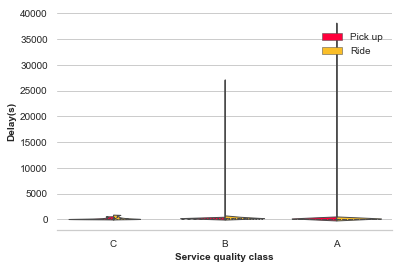

In [81]:
create_violin_plot(df_delay, "violin.pdf")

In [82]:
create_box_plot(df_delay, "violin.pdf")

KeyError: 'C'

In [76]:
df_delay = df_delay.rename(index=str, columns={"customer_segmentation": "Segmentation", "service_level": "Service level", "delay":"Delay(s)", "type":"Type", "class":"Service quality"})

In [75]:
g = sns.catplot(x="Service level",
                y="Delay(s)",
                hue="Type",
                col="Service quality",
                data=df_delay,
                kind="box",
                palette={"Pick up": "#FF003C", "Ride": "#FABE28"},
                height=4,
                aspect=1)

# FF003C, FF8A00, FABE28, 88C100, 00C176

IndexError: index 0 is out of bounds for axis 1 with size 0

<Figure size 0x288 with 0 Axes>

In [ ]:
df_delay

In [ ]:
g = sns.catplot(x="Service quality",
                y="Delay(s)",
                hue="Type",
                col="Segmentation",
                data=df_delay,
                kind="violin",
                split=True,
                palette={"Pick up": "#FF003C", "Ride": "#FABE28"},
                inner="quarter",
                height=4,
                aspect=1)

# FF003C, FF8A00, FABE28, 88C100, 00C176

In [ ]:
g = sns.catplot(x="Service quality",
                y="Delay(s)",
                hue="Type",
                col="Segmentation",
                data=df_delay,
                kind="box",
                palette={"Pick up": "#FF003C", "Ride": "#FABE28"},
                height=4,
                aspect=1)



In [ ]:
g = sns.catplot(x="Service quality",
                y="Delay(s)",
                hue="Type",
                col="Segmentation",
                data=df_delay,
                kind="strip",
                palette={"Pick up": "#FF003C", "Ride": "#FABE28"},
                height=4,
                aspect=1)


In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="class", y="pk_delay", data=df)
sns.despine(left=True)